# Covid Data Analysis and Visualizations

Welcome to my EDA notebook on Covid Data. This is an extended work on my covid data analysis in my last Linear Regression notebook as well as it is an assignment for the Programming with Python (SE307) course. In this notebook, I will be extending the dates of analysis on the previous notebook and adding some time series visualization. In addition, I will also be sharing the MATLAB script that I used for creating the CSV files. 

The reason that I used MATLAB for creating the script files is a bit of laziness. I previously created the CSV files during my work on the CovidDataAnalysis challenge of MathWorks, afterwards, I kept using the same CSV files. Now I updated the code on my MATLAB script to share it while using it for processing the extended data.

Let's get started.

I had to delete the outputs of the animated plots since they increase the size of the notebook quite a lot. Therefore, I share the version of the notebook I run on Colab where you can clearly see the results of animated plots without running the notebook.

<a href="https://colab.research.google.com/drive/1xT8S1XeJme6cHeI72LGDpIaXu7CBP9oi?usp=sharing"><img alt="Colab" src="https://camo.githubusercontent.com/5a7ab212ae85dd14fb49401321605c790e9942ea03205893c4a6399793d7b30c/68747470733a2f2f696d672e736869656c64732e696f2f62616467652f636f6c61622d62616467652e7376673f6c6f676f3d676f6f676c65636f6c6162266c6f676f436f6c6f723d79656c6c6f7726636f6c6f723d626c7565266c6162656c436f6c6f723d67726579" data-canonical-src="https://img.shields.io/badge/colab-badge.svg?logo=googlecolab&amp;logoColor=yellow&amp;color=blue&amp;labelColor=grey" style="max-width: 100%;"></a>

In [1]:
!pip install geoplot # let's install geoplot first so that we can create animated plots.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sbn
import geoplot as gp
import plotly.graph_objects as go
import math 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from matplotlib import animation as F
from IPython.display import HTML
matplotlib.rcParams['animation.embed_limit'] = 29

Let's start with animated plots as we did in the previous notebook. The data contains the cases between 2020-03-24 and 2022-03-24. This time we will be focusing more on the death toll and confirmed cases because the main data (provided by Johns Hopkins University) does not contain active cases after a certain date. Therefore, I will be showing the active cases in the time series analysis part. 

In [3]:
data=pd.read_csv("alldatasummary.csv")
data

,Country,Date,Sum_Confirmed,sum_Recovered,sum_Deaths,sum_Active,Median_CaseFatalityRatio,Median_IncidenceRate
0,Afghanistan,2020-03-23 00:00:00,40,1,1,38,NaN,NaN
1,Afghanistan,2020-03-24 00:00:00,42,1,1,40,NaN,NaN
2,Afghanistan,2020-03-25 00:00:00,74,2,1,71,NaN,NaN
3,Afghanistan,2020-03-26 00:00:00,80,2,2,76,NaN,NaN
4,Afghanistan,2020-03-27 00:00:00,91,2,2,87,NaN,NaN
...,...,...,...,...,...,...,...,...
128447,Zimbabwe,2022-03-20 00:00:00,244452,0,5426,0,2.219659,1644.709686
128448,Zimbabwe,2022-03-21 00:00:00,244452,0,5426,0,2.219659,1644.709686
128449,Zimbabwe,2022-03-22 00:00:00,244685,0,5429,0,2.218771,1646.277345
128450,Zimbabwe,2022-03-23 00:00:00,244685,0,5429,0,2.218771,1646.277345


The plot below will be showing change in confirmed cases during the pandemic.

In [ ]:
import plotly as py
import plotly.express as px
fig = px.choropleth(
    data[::1], 
    locations= 'Country', # We can also use lat and lon values but this one is more convenient.
    locationmode= 'country names', #Type of spatial coordinates
    color= 'Sum_Confirmed', # I will highlight Sum_Confirmed
    
    #When you draw your cursor on countries I want to show extra data about these countries. You can achieve this
    # by edding these hover properties.
    hover_name= 'Country', 
    hover_data= ['sum_Deaths','sum_Recovered','sum_Active'], 
    animation_frame= 'Date', 
    color_continuous_scale=px.colors.diverging.RdYlGn[::-1]
)    
fig.update_layout(
    title_text =   "COVID-19 Spread in the World up to 03 March 2022",
    title_x = 0.1,
    transition = {'duration': 1000000},
    geo= dict(
        showframe= False,
        showcoastlines= False,
        projection_type = 'equirectangular'
    )  
)


Next we will be plotting an animated bar to see the change in death toll during the pandemic.

In [5]:
def draw_barchart(date,case="sum_Deaths"):
    dff= (data[data['Date'].eq(date)].sort_values(by=case,ascending=False).head(10))[::-1];
    ax.clear();
    ax.barh(dff['Country'], dff[case], color=["#980505","#CD1212","#D84E4E","#CB6262","#D39B5F","#F7EC10","#D0F710","#9CF710","#B4D67F","#969C8E"][::-1]);
    dx = dff[case].max() / 100;
    for i, (value, name) in enumerate(zip(dff[case], dff['Country'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom');
        ax.text(value-dx, i-.25, value, size=10, color='#17202A', ha='right', va='baseline');
    

    ax.text(1, 0.3, date, transform=ax.transAxes, color='#777777', size=20, ha='right', weight=500);
    ax.text(0, 1.06, 'Number of Cases', transform=ax.transAxes, size=12, color='#777777');
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'));
    ax.xaxis.set_ticks_position('top');
    ax.tick_params(axis='x', colors='#777777', labelsize=12);
    ax.set_yticks([]);
    ax.margins(0, 0.01);
    ax.grid(which='major', axis='x', linestyle='-');
    ax.set_axisbelow(True);
    ax.text(0, 1.12, 'The Death toll up to 2023-03-23',
            transform=ax.transAxes, size=24, weight=600, ha='left');
    plt.box(False);
    plt.tight_layout();

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8 ));
animator = animation.FuncAnimation(fig, draw_barchart, frames=data['Date'].unique());
bar_animated=HTML(animator.to_jshtml());

In [ ]:
bar_animated

## Basic Time Series Analysis

Let's get on with the basic time series analysis now. I will first load the data and then do some very basic preprocessing.

In [8]:
confirmed_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed_cases = pd.read_csv(confirmed_cases_data_url)
confirmed_cases.drop(["Province/State","Lat","Long","Country/Region"], inplace=True, axis=1)
confirmed_cases.head(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22
0,0,0,0,0,0,0,0,0,0,0,...,205391,205506,205541,205612,205612,205802,205830,205907,206073,206133
1,0,0,0,0,0,0,0,0,0,0,...,333293,333305,333316,333322,333330,333330,333338,333343,333360,333381
2,0,0,0,0,0,0,0,0,0,0,...,271041,271050,271057,271061,271061,271079,271082,271090,271096,271100
3,0,0,0,0,0,0,0,0,0,0,...,46824,46824,46824,46824,46824,46824,46824,47219,47219,47219
4,0,0,0,0,0,0,0,0,0,0,...,104491,104491,104491,104491,104491,104491,104491,104676,104676,104676


In [9]:
death_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deaths_cases = pd.read_csv(death_cases_data_url)
deaths_cases.drop(["Province/State","Lat","Long","Country/Region"], inplace=True, axis=1)
deaths_cases.head(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22
0,0,0,0,0,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7833,7833,7833,7834,7834
1,0,0,0,0,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,0,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,0,0,0,0,0,0,0,0,0,0,...,156,156,156,156,156,156,156,157,157,157
4,0,0,0,0,0,0,0,0,0,0,...,1923,1923,1923,1923,1923,1923,1923,1924,1924,1924


In [10]:
recovered_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recovered_cases = pd.read_csv(recovered_cases_data_url)
recovered_cases.drop(["Province/State","Lat","Long","Country/Region"], inplace=True, axis=1)
recovered_cases.head(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I want the data to contain only instances until 3/23/22, therefore I will get the index of this column and omit the instances after this column. Additionally, I will fill in missing values with zero.

In [11]:
recovered_cases.columns.get_loc("3/23/22")

791

In [12]:
recovered_cases=recovered_cases.iloc[:, : 791]
deaths_cases=deaths_cases.iloc[:, : 791]
confirmed_cases=confirmed_cases.iloc[:, : 791]

confirmed_cases.fillna(0, inplace=True)
deaths_cases.fillna(0, inplace=True)
recovered_cases.fillna(0, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Now I will basically plot the change in cases for the two years. Also, I will calculate active cases.

In [13]:
dates = recovered_cases.keys()
sum_Confirmed = []
sum_Deaths = [] 
sum_Recovered = [] 
sum_Active = []

for i in dates:
    confirmed_sum = confirmed_cases[i].sum()
    death_sum = deaths_cases[i].sum()
    recovered_sum = recovered_cases[i].sum()
    sum_Confirmed.append(confirmed_sum)
    sum_Deaths.append(death_sum)
    sum_Recovered.append(recovered_sum)
    sum_Active.append(confirmed_sum-(recovered_sum+death_sum))

In [14]:
d = {'Confirmed': sum_Confirmed, 'Deaths': sum_Deaths, 'Recovered': sum_Recovered, 'Active':sum_Active, 'Dates':dates}
time_Series_Data=pd.DataFrame(data=d)
time_Series_Data['Dates'] = pd.to_datetime(time_Series_Data['Dates'], infer_datetime_format=True) 
time_Series_Data.head(5)

,Confirmed,Deaths,Recovered,Active,Dates
0,557,17,30,510,2020-01-22
1,657,18,32,607,2020-01-23
2,944,26,39,879,2020-01-24
3,1437,42,42,1353,2020-01-25
4,2120,56,56,2008,2020-01-26


(array([737425., 737516., 737607., 737699., 737791., 737881., 737972.,
        738064., 738156., 738246.]),
 <a list of 10 Text major ticklabel objects>)

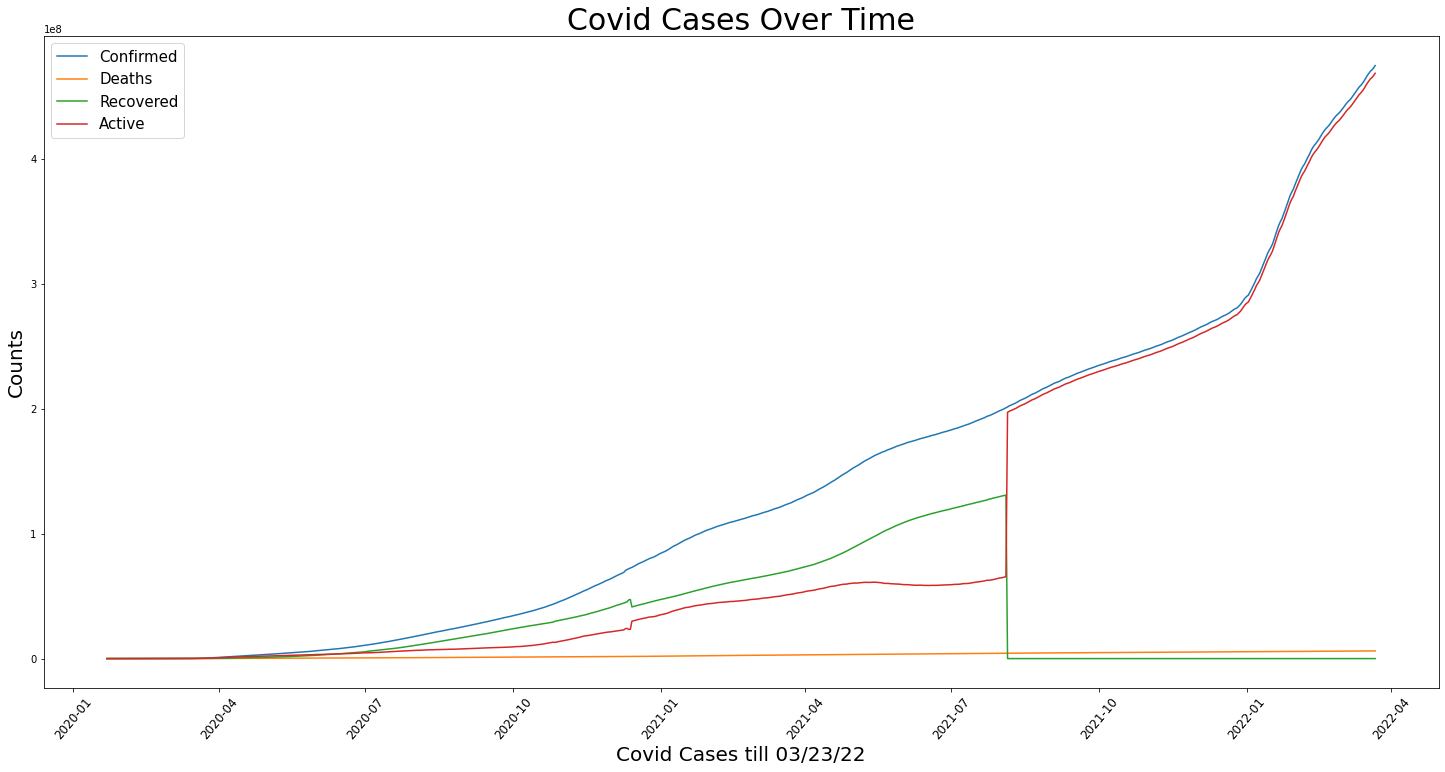

In [15]:
import seaborn as sns
plt.figure(figsize=(25, 12))
sns.lineplot(data=time_Series_Data,x="Dates", y="Confirmed")
sns.lineplot(data=time_Series_Data,x="Dates", y="Deaths")
sns.lineplot(data=time_Series_Data,x="Dates", y="Recovered")
sns.lineplot(data=time_Series_Data,x="Dates", y="Active")
plt.title('Covid Cases Over Time', size=30)
plt.legend(["Confirmed","Deaths","Recovered","Active"],fontsize=15)
plt.xlabel('Covid Cases till 03/23/22', size=20)
plt.ylabel('Counts', size=20)
plt.xticks(rotation=50, size=12)

## Analysis on Countries with Highest Deaths and Confirmed Cases

Now we will focus on the ten countries with the highest death toll and confirmed cases. 

Let's start off by loading the data.

In [16]:
data_confirmed=pd.read_csv("tenmostconfirmed.csv")
data_confirmed = data_confirmed.rename(columns={'Sum_Confirmed': 'sum_Confirmed'})
data_confirmed

,Country,Date,sum_Confirmed,sum_Recovered,sum_Deaths,sum_Active,Median_CaseFatalityRatio,Median_IncidenceRate
0,Brazil,2020-03-23 00:00:00,1924,2,34,1888,NaN,NaN
1,Brazil,2020-03-24 00:00:00,2247,2,46,2199,NaN,NaN
2,Brazil,2020-03-25 00:00:00,2554,2,59,2493,NaN,NaN
3,Brazil,2020-03-26 00:00:00,2985,6,77,2902,NaN,NaN
4,Brazil,2020-03-27 00:00:00,3417,6,92,3319,NaN,NaN
...,...,...,...,...,...,...,...,...
6603,United Kingdom,2022-03-20 00:00:00,20243940,0,190860,0,0.492132,23438.795623
6604,United Kingdom,2022-03-21 00:00:00,20243940,0,191029,0,0.492132,23438.795623
6605,United Kingdom,2022-03-22 00:00:00,20470351,0,191188,0,0.489537,23479.657791
6606,United Kingdom,2022-03-23 00:00:00,20566021,0,191354,0,0.488615,23557.861449


In [17]:
data_deaths=pd.read_csv("tenmostdeaths.csv")
data_deaths = data_deaths.rename(columns={'Sum_Confirmed': 'sum_Confirmed'})
data_deaths

,Country,Date,sum_Confirmed,sum_Recovered,sum_Deaths,sum_Active,Median_CaseFatalityRatio,Median_IncidenceRate
0,Brazil,2020-03-23 00:00:00,1924,2,34,1888,NaN,NaN
1,Brazil,2020-03-24 00:00:00,2247,2,46,2199,NaN,NaN
2,Brazil,2020-03-25 00:00:00,2554,2,59,2493,NaN,NaN
3,Brazil,2020-03-26 00:00:00,2985,6,77,2902,NaN,NaN
4,Brazil,2020-03-27 00:00:00,3417,6,92,3319,NaN,NaN
...,...,...,...,...,...,...,...,...
6600,United Kingdom,2022-03-20 00:00:00,20243940,0,190860,0,0.492132,23438.795623
6601,United Kingdom,2022-03-21 00:00:00,20243940,0,191029,0,0.492132,23438.795623
6602,United Kingdom,2022-03-22 00:00:00,20470351,0,191188,0,0.489537,23479.657791
6603,United Kingdom,2022-03-23 00:00:00,20566021,0,191354,0,0.488615,23557.861449


I will show the confirmed cases and death toll for both of these dataframes above.

Text(0.5, 1.0, 'Ten Countries with Highest Confirmed Cases: Confirmed')

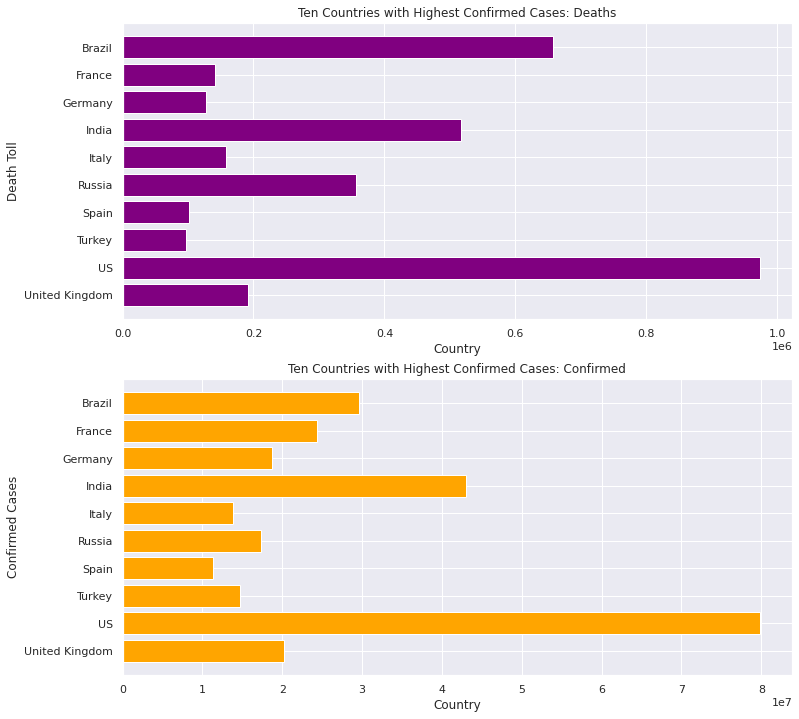

In [18]:
sns.set_theme()
# This 00:00:00 is sort of irritating firstly i get rid of them. 
data_confirmed['Date'] = data_confirmed['Date'].str.replace(' 00:00:00','')

#data['sum_Recovered']=data['sum_Recovered'].values[data['sum_Recovered'].values <=0] = 0.0000000001 # we need this for tranformation.

country_list = data_confirmed['Country'].unique().tolist()
total_list = data_confirmed[data_confirmed['Date'].eq('2022-03-21')]['sum_Deaths'].tolist()
total_list2 = data_confirmed[data_confirmed['Date'].eq('2022-03-21')]['sum_Confirmed'].tolist()
plot_df = pd.DataFrame(list(zip(country_list, total_list,total_list2)), 
               columns =['Country', 'sum_Death','sum_Confirmed'])

plot_dff=plot_df[::-1]
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(12, 12))
ax1.barh(plot_dff['Country'], plot_dff['sum_Death'],color="purple")
ax2.barh(plot_dff['Country'], plot_dff['sum_Confirmed'],color="orange")
ax1.set(xlabel='Country', ylabel='Death Toll')
ax2.set(xlabel='Country', ylabel='Confirmed Cases')
ax1.set_title("Ten Countries with Highest Confirmed Cases: Deaths")
ax2.set_title("Ten Countries with Highest Confirmed Cases: Confirmed")

Text(0.5, 1.0, 'Ten Countries with Highest Death Toll: Confirmed')

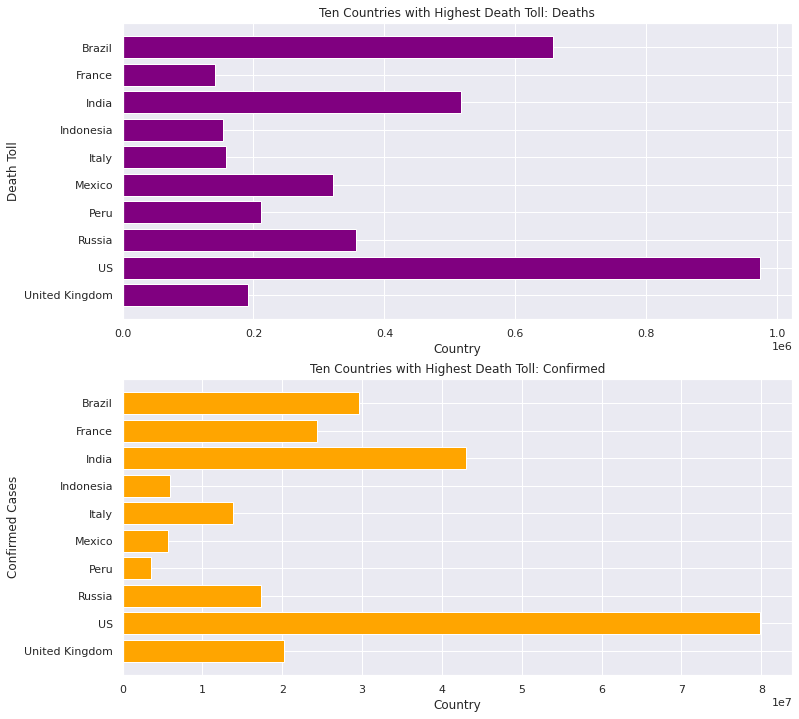

In [19]:
sns.set_theme()
# This 00:00:00 is sort of irritating firstly i get rid of them. 
data_deaths['Date'] = data_deaths['Date'].str.replace(' 00:00:00','')

#data['sum_Recovered']=data['sum_Recovered'].values[data['sum_Recovered'].values <=0] = 0.0000000001 # we need this for tranformation.

country_list = data_deaths['Country'].unique().tolist()
total_list = data_deaths[data_deaths['Date'].eq('2022-03-21')]['sum_Deaths'].tolist()
total_list2 = data_deaths[data_deaths['Date'].eq('2022-03-21')]['sum_Confirmed'].tolist()
plot_df = pd.DataFrame(list(zip(country_list, total_list,total_list2)), 
               columns =['Country', 'sum_Death','sum_Confirmed'])

plot_dff=plot_df[::-1]
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(12, 12))
ax1.barh(plot_dff['Country'], plot_dff['sum_Death'],color="purple")
ax2.barh(plot_dff['Country'], plot_dff['sum_Confirmed'],color="orange")
ax1.set(xlabel='Country', ylabel='Death Toll')
ax2.set(xlabel='Country', ylabel='Confirmed Cases')
ax1.set_title("Ten Countries with Highest Death Toll: Deaths")
ax2.set_title("Ten Countries with Highest Death Toll: Confirmed")

Let's also plot the density of cases-vs-time for the countries with the highest death toll.

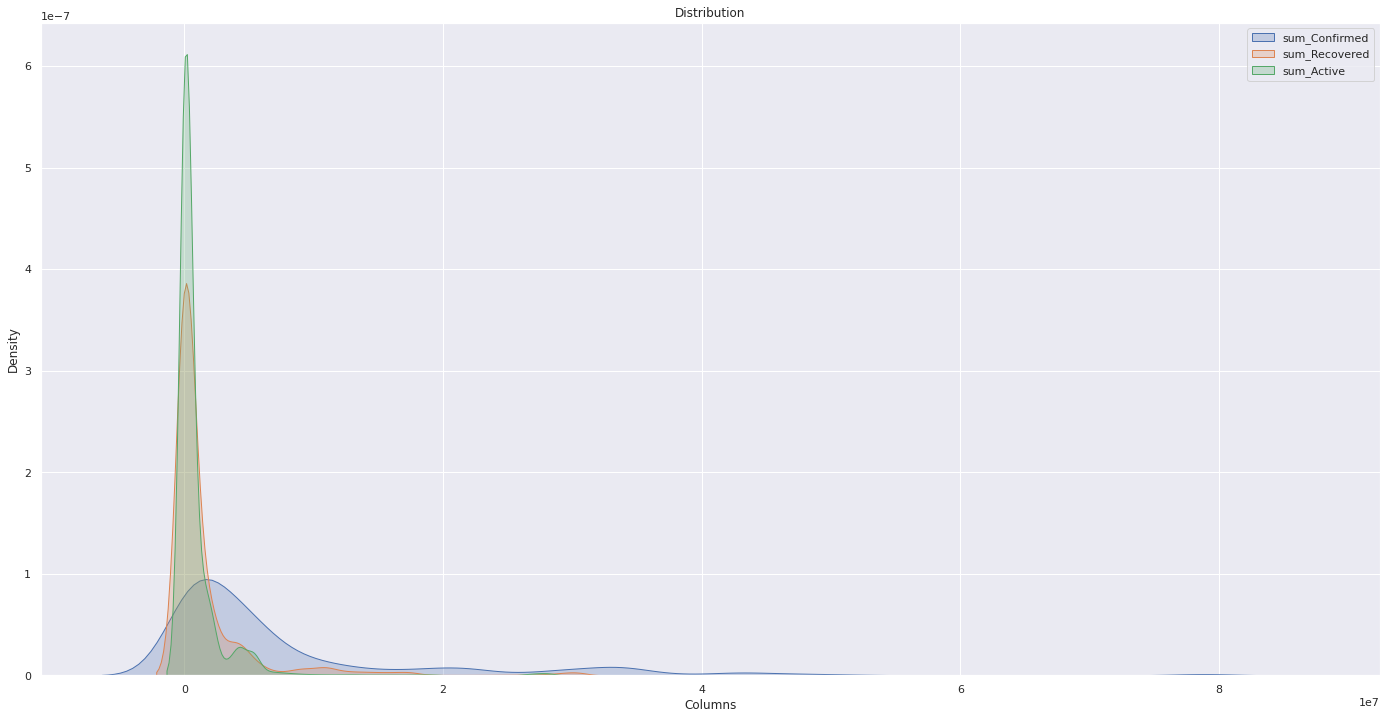

In [20]:
fig , ax = plt.subplots(figsize=(24, 12)) 
for col in data_deaths.columns:
    if "sum" in col:
        if col !="sum_Deaths":
            sns.kdeplot(data_deaths[col], shade=True,label=col)
            
           
leg = plt.legend(frameon=True)
ax.set(xlabel='Columns', 
       ylabel='Density', 
       title='Distribution');           

I wonder how the death toll of the ten countries in both of the data frames changed during the pandemic. Let's create a subset of our data where we only include the first day of each month and plot it to see the change in the death toll.

In [21]:
data_deaths_ts = data_deaths.loc[data_deaths['Date'].isin(["2020-04-01","2020-05-01","2020-06-01","2020-07-01",
                            "2020-08-01","2020-09-01","2020-10-01","2020-11-01"
                           ,"2020-12-01","2021-01-01","2021-02-01","2021-03-01"
                           ,"2021-04-01","2021-05-01","2021-06-01","2021-07-01"
                           ,"2021-08-01","2021-09-01","2021-10-01","2021-11-01"
                           ,"2021-12-01","2022-01-01","2022-02-01","2022-03-01"])]

data_confirmed_ts = data_confirmed.loc[data_confirmed['Date'].isin(["2020-04-01","2020-05-01","2020-06-01","2020-07-01",
                            "2020-08-01","2020-09-01","2020-10-01","2020-11-01"
                           ,"2020-12-01","2021-01-01","2021-02-01","2021-03-01"
                           ,"2021-04-01","2021-05-01","2021-06-01","2021-07-01"
                           ,"2021-08-01","2021-09-01","2021-10-01","2021-11-01"
                           ,"2021-12-01","2022-01-01","2022-02-01","2022-03-01"])]

Text(0.5, 1.0, 'Death Toll Change During the Pandemic for: data_confirmed')

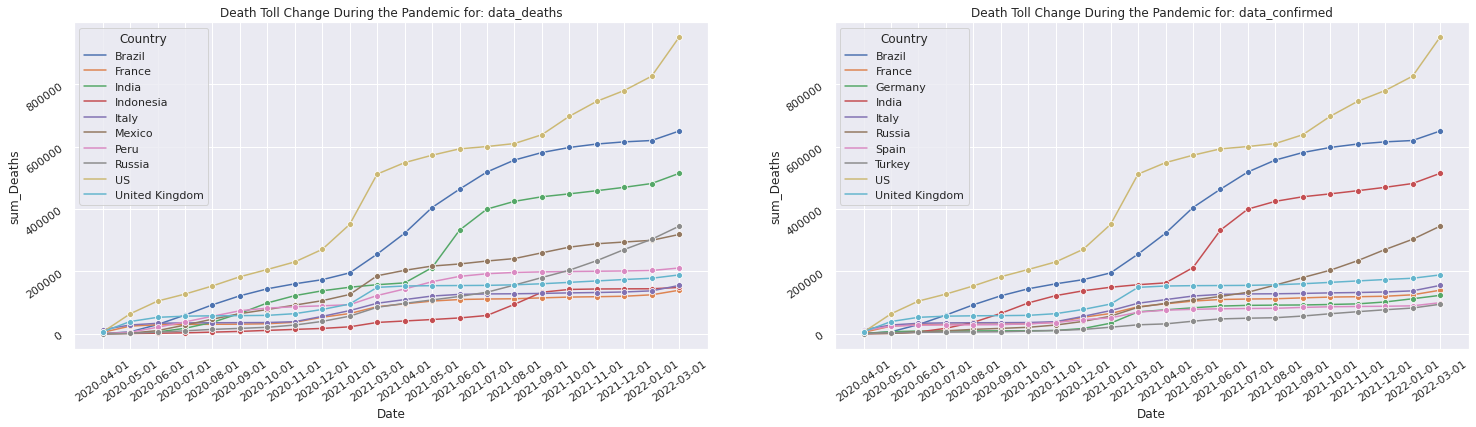

In [22]:
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(25, 6)) 
sns.lineplot(x="Date", y="sum_Deaths", hue="Country", marker='o',err_style='bars', data=data_deaths_ts,ax=ax1)
sns.lineplot(x="Date", y="sum_Deaths", hue="Country", marker='o',err_style='bars', data=data_confirmed_ts,ax=ax2)
ax1.tick_params(rotation=35);
ax2.tick_params(rotation=35);
ax1.set_title("Death Toll Change During the Pandemic for: data_deaths")
ax2.set_title("Death Toll Change During the Pandemic for: data_confirmed")

I will now turn my attention to plot summary statistics. I will be using `boxplot()` for getting some intuition of interquartile range and `violinplot()` for getting a better idea of the distribution in data.

Text(0.5, 1.0, 'Box Plot for data_confirmed')

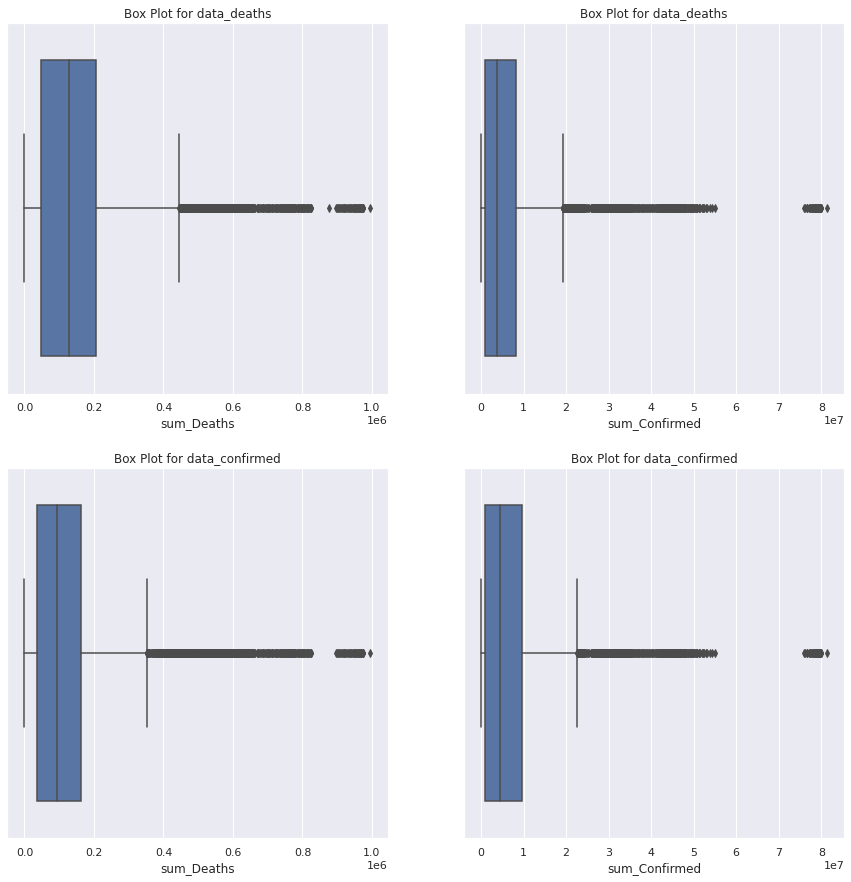

In [23]:
fig , ax = plt.subplots(2,2,figsize=(15, 15)) 
sns.boxplot(x=data_deaths['sum_Deaths'], ax=ax[0,0])
sns.boxplot(x=data_deaths['sum_Confirmed'],ax=ax[0,1])
sns.boxplot(x=data_confirmed['sum_Deaths'],ax=ax[1,0])
sns.boxplot(x=data_confirmed['sum_Confirmed'],ax=ax[1,1])
ax[0,0].set_title("Box Plot for data_deaths")
ax[0,1].set_title("Box Plot for data_deaths")
ax[1,0].set_title("Box Plot for data_confirmed")
ax[1,1].set_title("Box Plot for data_confirmed")

It looks like a big part of the data is out of the interquartile range.

Text(0.5, 1.0, 'Violin Plot for data_confirmed')

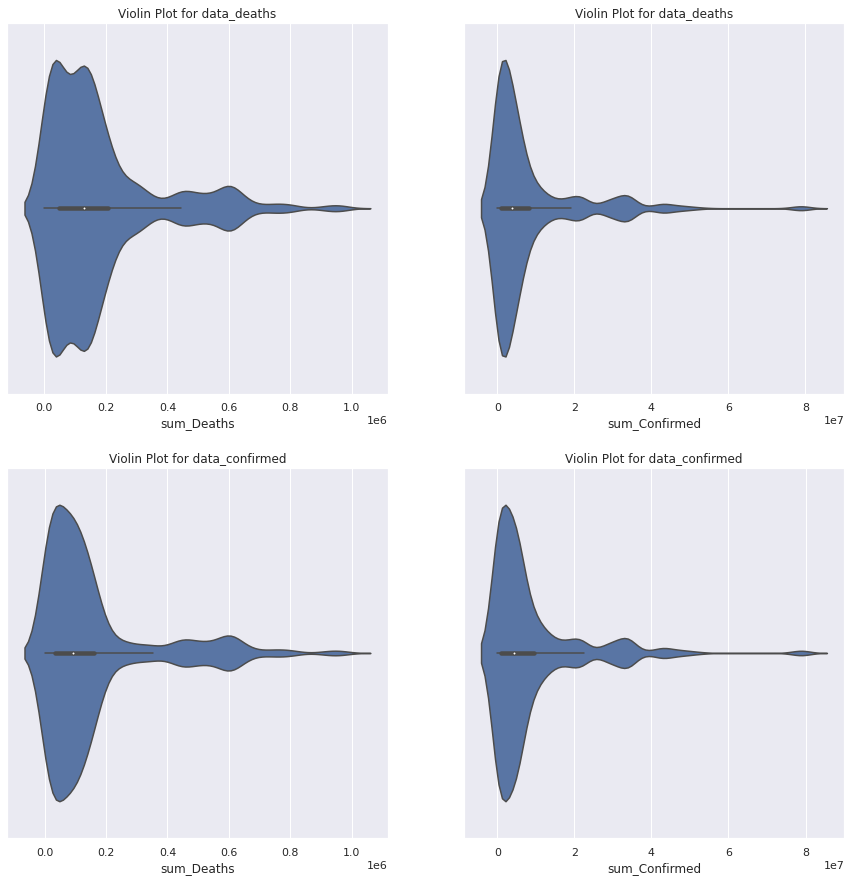

In [24]:
fig , ax = plt.subplots(2,2,figsize=(15, 15)) 
sns.violinplot(x=data_deaths['sum_Deaths'], ax=ax[0,0])
sns.violinplot(x=data_deaths['sum_Confirmed'],ax=ax[0,1])
sns.violinplot(x=data_confirmed['sum_Deaths'],ax=ax[1,0])
sns.violinplot(x=data_confirmed['sum_Confirmed'],ax=ax[1,1])
ax[0,0].set_title("Violin Plot for data_deaths")
ax[0,1].set_title("Violin Plot for data_deaths")
ax[1,0].set_title("Violin Plot for data_confirmed")
ax[1,1].set_title("Violin Plot for data_confirmed")

Lastly let's also look at correlations.

In [25]:
corr_matrix1 = data_confirmed.corr()
corr_matrix1['sum_Deaths'].sort_values(ascending=False)


sum_Deaths                  1.000000
sum_Confirmed               0.924757
Median_IncidenceRate        0.491314
sum_Recovered               0.168255
sum_Active                  0.091747
Median_CaseFatalityRatio   -0.137258
Name: sum_Deaths, dtype: float64

In [26]:
corr_matrix2 = data_deaths.corr()
corr_matrix2['sum_Deaths'].sort_values(ascending=False)

sum_Deaths                  1.000000
sum_Confirmed               0.902123
Median_IncidenceRate        0.621212
sum_Recovered               0.153031
sum_Active                  0.080273
Median_CaseFatalityRatio   -0.175165
Name: sum_Deaths, dtype: float64

I will visualize the most correlated and the least correlated features by using `jointplot()`. Since in both of the data frames the most correlated and the least correlated features are the same, I will only use one of them in the jointplot.

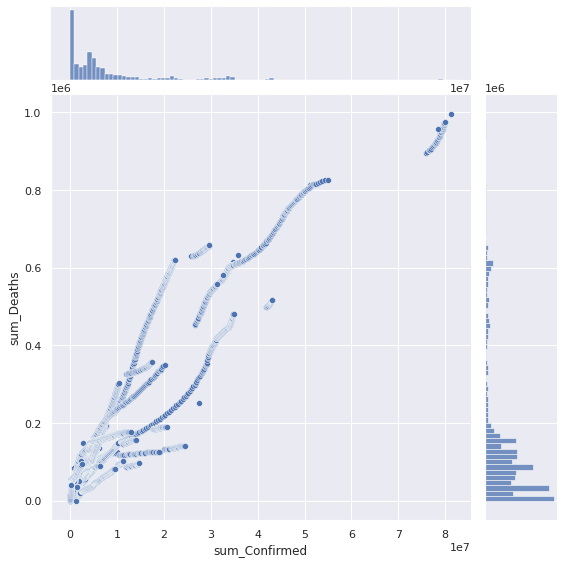

In [27]:
sns.jointplot(x=data_confirmed['sum_Confirmed'], y=data_confirmed['sum_Deaths'],height=8);

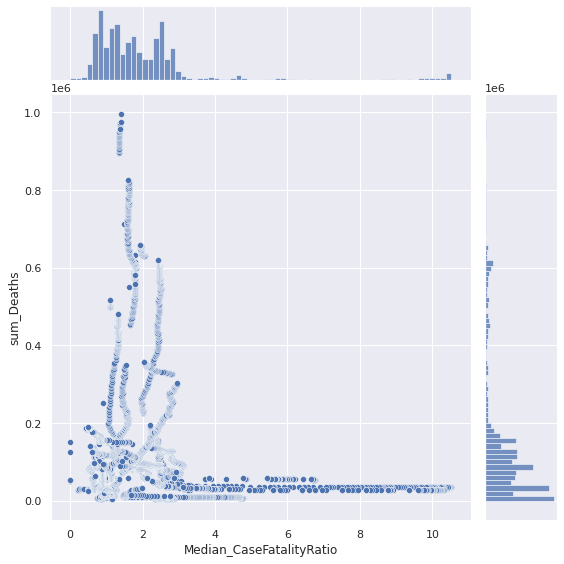

In [28]:
sns.jointplot(x=data_confirmed['Median_CaseFatalityRatio'], y=data_confirmed['sum_Deaths'],height=8);